In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [31]:
train_df = pd.read_parquet(r'data/신용카드데이터 (1).parquet')

In [32]:
target1=pd.read_parquet(r'data/train/1.회원정보/201807_train_.parquet')
target2=pd.read_parquet(r'data/train/1.회원정보/201808_train_.parquet')
target3=pd.read_parquet(r'data/train/1.회원정보/201809_train_.parquet')
target4=pd.read_parquet(r'data/train/1.회원정보/201810_train_.parquet')
target5=pd.read_parquet(r'data/train/1.회원정보/201811_train_.parquet')
target6=pd.read_parquet(r'data/train/1.회원정보/201812_train_.parquet')

In [33]:
tg_df = pd.concat([target1['Segment'], target2['Segment'], target3['Segment'], target4['Segment'], target5['Segment'], target6['Segment']])
tg_df.reset_index(inplace=True, drop=True)
tg_df

0          D
1          E
2          C
3          D
4          E
          ..
2399995    E
2399996    D
2399997    C
2399998    E
2399999    E
Name: Segment, Length: 2400000, dtype: object

In [34]:
train_df['Segment'] = tg_df

In [35]:
train_df = train_df.drop(['ID', '기준년월'], axis=1)

In [36]:
train_df

,소지카드수_이용가능_신용,소지카드수_유효_신용,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,...,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M,Segment
0,1,1,0,0,0,0,0,196,196,3681,...,12226,1회 이상,1084,1503,1791,998,736,1083,10회 이상,D
1,1,1,0,0,0,0,0,13475,13475,13323,...,5834,1회 이상,4090,4447,3761,2565,6795,1424,1회 이상,E
2,1,1,1,1,0,0,0,23988,23988,24493,...,21866,1회 이상,5006,5540,6796,5312,5150,6143,1회 이상,C
3,2,2,1,1,0,0,0,3904,3904,5933,...,16356,1회 이상,487,606,772,730,462,708,10회 이상,D
4,1,1,1,1,0,0,0,1190,0,0,...,0,1회 이상,0,0,0,0,0,0,1회 이상,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,1,1,1,1,0,0,0,10755,7267,5640,...,0,1회 이상,0,0,0,0,0,0,1회 이상,E
2399996,1,1,1,1,0,0,0,27636,27636,26357,...,14402,1회 이상,4412,5515,9424,3351,4142,4362,1회 이상,D
2399997,1,1,1,1,1,1,1,23187,23187,17171,...,5731,1회 이상,2694,3046,2998,2524,1523,2898,1회 이상,C
2399998,1,1,0,0,1,1,1,0,0,0,...,0,1회 이상,0,0,0,0,0,0,1회 이상,E


In [38]:
# 인코딩할 컬럼 리스트
factor_cols = [
    '이용금액대', '이용가능여부_해외겸용_본인', '보유여부_해외겸용_본인',
    '상향가능한도금액', '상향가능CA한도금액', '할인건수_R3M',
    '인입횟수_ARS_R6M', '수신거부여부_TM', '수신거부여부_메일', '수신거부여부_DM'
]

# 매핑 사전 저장용 딕셔너리
encoders = {}

# train_df에 factorize 적용 + 매핑 저장
for col in factor_cols:
    codes, uniques = pd.factorize(train_df[col])
    train_df[col] = codes
    encoders[col] = {val: idx for idx, val in enumerate(uniques)}

In [37]:
# # 입력데이터의 X 의 컬럼의 개수가 많으면 각각의 조합으로 모두 시각화 해봐야 한다.
# # pairplot 사용
# sns.pairplot(data=train_df, hue='Segment')
# plt.show()

In [40]:
# pca 사용
# n_components : 축소될 결과의 컬럼 개수
pca = PCA(n_components=25)
# 결과 데이터를 제거한다. 
X = train_df.drop('Segment', axis=1)
# 학습한다.
pca.fit(X)
# 데이터를 변환한다.
r1 = pca.transform(X)
r1

array([[-2.24355293e+03,  7.31778228e+04, -2.33070671e+04, ...,
         1.23575094e+03, -6.79654072e+02, -2.31497722e+03],
       [-4.12359358e+03, -1.85967998e+04, -5.28155393e+03, ...,
         2.83123512e+03, -6.81378931e+01, -4.09367207e+02],
       [ 9.38444950e+04,  1.23215256e+05, -2.11108391e+04, ...,
         1.27774968e+03,  7.38283748e+02,  1.99285976e+03],
       ...,
       [ 1.75905958e+04,  3.33447439e+03,  5.99649294e+03, ...,
        -1.72655774e+03,  9.66842573e+02, -1.17321652e+03],
       [-7.50896539e+04, -3.66573195e+03, -3.62002012e+03, ...,
        -2.53046171e+02,  4.52481772e+01, -3.81512640e+02],
       [-3.57877045e+04,  4.33569086e+03,  7.98641356e+03, ...,
         8.87256632e+02, -1.74421971e+03,  1.38206266e+03]])

In [42]:
# 결과데이터를 붙혀서 시각화 해본다
pca_df = pd.DataFrame(r1, columns=[f'p{i+1}' for i in range(r1.shape[1])])
pca_df['Segment'] = train_df['Segment']
pca_df

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p17,p18,p19,p20,p21,p22,p23,p24,p25,Segment
0,-2243.552933,73177.822751,-23307.067102,7561.747680,-3243.689945,4528.594709,-4408.328899,8369.204846,-6309.014641,1232.178495,...,-883.032259,7041.455364,-670.054714,1078.355402,1920.870547,2544.053619,1235.750939,-679.654072,-2314.977216,D
1,-4123.593577,-18596.799844,-5281.553928,552.003971,2047.728562,2851.121296,-2005.535562,3877.903215,-889.924568,3031.998145,...,1026.829959,673.134529,657.221496,1475.141165,863.926840,-1177.211648,2831.235120,-68.137893,-409.367207,E
2,93844.494981,123215.256247,-21110.839100,-7111.076138,-5582.733393,13547.760971,-1048.762694,9425.227220,1943.737288,-143.578503,...,-2319.200651,-747.349426,-2800.120608,1230.518402,-1406.511713,-2206.140597,1277.749684,738.283748,1992.859764,C
3,10648.448214,115700.176918,-21742.094573,11510.390672,-7770.532201,-7559.367421,-5333.651781,13026.736609,-76.952401,259.298011,...,-483.344560,5666.289339,-71.778393,949.211049,2950.268504,975.595853,801.520108,-9.139923,-968.875714,D
4,-76132.442560,-2534.422667,-1881.492818,724.219680,-55.011442,-2366.802627,-931.083210,71.543290,-16.547834,-290.180408,...,183.348897,-279.655391,-284.008621,-2322.540842,-2072.645932,634.432208,-1033.942702,473.094923,-216.472421,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,-70708.144660,-4606.543015,2805.802812,-7312.121123,-3526.939821,-4965.947914,220.135111,1057.678517,2360.636914,1934.651584,...,-14.643096,-632.996628,-775.194681,-1093.950869,-880.464696,-509.537637,-358.298234,6.232325,-456.213452,E
2399996,140275.356530,814.052457,-29512.108767,23504.905499,-9175.280457,5675.125393,16409.620662,2465.542079,-4928.311445,2604.849964,...,-977.313742,-6006.581774,245.148039,-1467.533990,-3041.636512,-2123.278748,2089.569477,-2060.825006,-146.818560,D
2399997,17590.595793,3334.474385,5996.492939,645.269909,-4197.372200,1762.693541,-60.440877,2115.391058,-919.578172,2820.212880,...,684.830802,1682.248555,-405.046693,302.598929,-458.846992,-558.545886,-1726.557745,966.842573,-1173.216523,C
2399998,-75089.653851,-3665.731945,-3620.020117,709.662982,42.502434,-1556.732214,-1652.830372,84.509015,-302.824774,-692.984227,...,68.816194,-250.279003,3.779371,-234.113635,-94.101872,-461.100118,-253.046171,45.248177,-381.512640,E


In [11]:
# pca는 PCA 모델 객체라고 가정
import pandas as pd

pca_components = pd.DataFrame(pca.components_,
                               columns=train_df.drop('Segment', axis=1).columns,
                               index=[f'p{i+1}' for i in range(pca.n_components_)])
pca_components


,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,이용카드수_신용체크,_2순위카드이용금액,...,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
p1,7.881979e-07,5.929148e-07,4.725392e-07,4.379121e-07,4.367648e-07,0.204094,0.202691,0.132730,5.064627e-06,0.044561,...,0.196747,0.063447,1.638855e-06,0.052332,0.051242,0.054778,0.044341,0.046641,0.046802,-1.585139e-07
p2,3.422140e-07,2.956462e-07,-8.207606e-07,-7.831961e-07,-8.078633e-07,-0.047295,-0.041628,-0.016251,-1.081534e-06,-0.017671,...,0.340864,0.104889,-7.875029e-07,-0.011179,-0.010103,-0.009970,-0.003473,0.000258,0.001241,-1.131097e-06
p3,1.181738e-06,7.289834e-07,-2.814743e-07,-3.044689e-07,-2.561162e-07,0.341948,0.269260,0.137947,1.290101e-05,0.101481,...,0.011171,0.011974,3.855585e-06,-0.011238,-0.001476,0.001465,-0.007763,-0.006238,-0.003067,-3.060030e-07
p4,-1.581417e-06,-1.437586e-06,-1.381237e-06,-1.107458e-06,-1.232100e-06,-0.484040,-0.348635,-0.049405,-2.148198e-05,-0.250438,...,-0.106655,-0.061563,-7.037193e-06,-0.095266,-0.095766,-0.086591,-0.092661,-0.114946,-0.110481,-2.226404e-07
p5,-2.649350e-07,-2.858530e-07,-8.488361e-07,-7.600943e-07,-7.916612e-07,-0.242299,-0.137369,-0.001689,-9.641927e-06,-0.111564,...,0.052040,0.030358,-2.392066e-06,0.360463,0.350086,0.353694,0.346034,0.434325,0.421026,-3.053537e-07
p6,4.739780e-07,-2.383977e-07,-4.338794e-07,-2.813960e-07,-3.492388e-07,-0.357718,-0.103401,0.214098,-2.149801e-05,-0.292886,...,0.172325,0.059362,-2.725441e-06,-0.090350,-0.062907,-0.049119,-0.093667,-0.105685,-0.084230,5.593357e-07
p7,2.865326e-06,2.376606e-06,6.145404e-07,7.983708e-07,6.945812e-07,0.172475,-0.008809,0.018043,6.912092e-06,-0.029613,...,-0.243497,-0.073507,-1.573628e-06,-0.005928,0.042070,0.112459,-0.011894,0.004731,0.029857,-7.100258e-07
p8,-1.128177e-07,-1.246667e-07,-1.807161e-06,-1.637106e-06,-1.727300e-06,0.027198,-0.003814,0.128360,-1.182782e-05,-0.125521,...,0.654416,0.240860,-7.135360e-06,-0.020233,0.017153,0.026956,-0.036861,-0.011498,-0.006545,-2.869652e-07
p9,2.027437e-06,1.879578e-06,-1.517907e-06,-9.984484e-07,-1.147316e-06,0.204356,-0.156228,0.285301,-2.105582e-05,-0.402607,...,-0.299092,-0.074722,-9.419840e-06,0.033289,0.014445,0.006915,0.031771,0.028718,0.015697,-1.293309e-06
p10,6.138943e-06,5.526612e-06,1.063807e-06,1.992524e-06,1.885218e-06,0.555430,-0.458517,-0.002437,5.132976e-07,-0.447764,...,0.086139,-0.000924,-1.061741e-05,-0.002963,-0.023608,-0.032888,0.002106,0.009628,0.015938,2.439904e-07


In [12]:
# 절댓값 기준 가장 영향 큰 변수들 보기 (상위 5개씩)
for i in range(pca_components.shape[0]):
    print(f"\n📌 주성분 p{i+1}")
    print(pca_components.iloc[i].abs().sort_values(ascending=False).head(5))



📌 주성분 p1
이용금액_일시불_R12M    0.653985
청구금액_R6M         0.412379
이용금액_오프라인_R6M    0.307691
이용금액_일시불_R6M     0.269442
이용금액_R3M_신용체크    0.204094
Name: p1, dtype: float64

📌 주성분 p2
청구금액_R6M         0.768977
이용금액_일시불_R12M    0.482542
청구금액_R3M         0.340864
이용금액_일시불_R6M     0.114128
청구금액_B0          0.104889
Name: p2, dtype: float64

📌 주성분 p3
이용금액_오프라인_R6M    0.571257
이용금액_일시불_R12M    0.502397
이용금액_R3M_신용체크    0.341948
이용금액_오프라인_R3M    0.275814
이용금액_R3M_신용      0.269260
Name: p3, dtype: float64

📌 주성분 p4
이용금액_오프라인_R6M      0.637384
이용금액_R3M_신용체크      0.484040
이용금액_R3M_신용        0.348635
_2순위카드이용금액         0.250438
최대이용금액_일시불_R12M    0.163003
Name: p4, dtype: float64

📌 주성분 p5
잔액_일시불_B1M      0.434325
잔액_일시불_B2M      0.421026
월중평잔_일시불_B0M    0.360463
평잔_일시불_3M       0.353694
월중평잔_일시불        0.350086
Name: p5, dtype: float64

📌 주성분 p6
이용금액_일시불_R6M     0.625635
이용금액_R3M_신용체크    0.357718
이용금액_일시불_R3M     0.296299
_2순위카드이용금액       0.292886
이용금액_오프라인_R6M    0.256983
Name: p6, dtype: float64

📌 주성

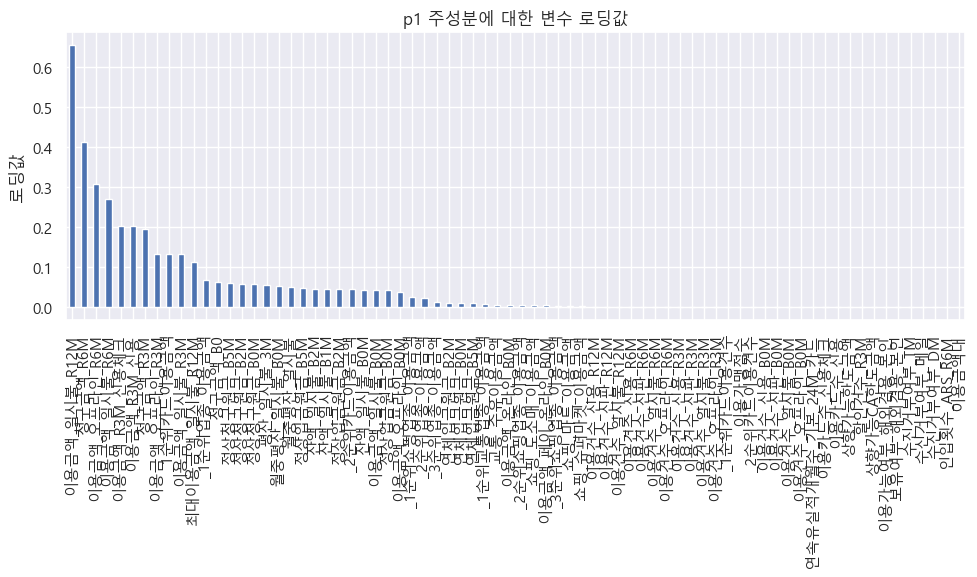

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pca_components.loc['p1'].sort_values(ascending=False).plot(kind='bar')
plt.title('p1 주성분에 대한 변수 로딩값')
plt.ylabel('로딩값')
plt.tight_layout()
plt.show()


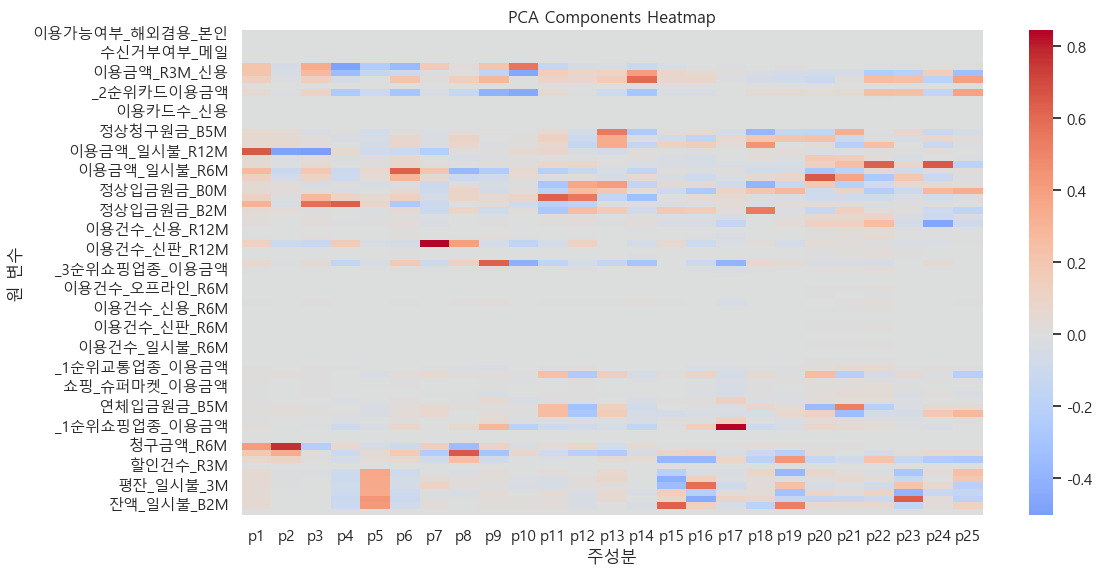

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components.T, cmap='coolwarm', center=0)
plt.title('PCA Components Heatmap')
plt.xlabel('주성분')
plt.ylabel('원 변수')
plt.tight_layout()
plt.show()


In [15]:
# 차원축소
# PCA
pca = PCA(n_components=25)
pca_X = pca.fit_transform(X)

In [16]:
X = train_df.drop('Segment', axis=1)
y = train_df['Segment']

In [19]:
from sklearn.preprocessing import LabelEncoder

# 문자형 Segment를 숫자형으로 변환
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [20]:
print(le.classes_)
# 출력 예시: ['A' 'B' 'C' 'D' 'E']

['A' 'B' 'C' 'D' 'E']


In [21]:
# 교차검증을 통해 확인해본다.
model1 = XGBClassifier(slient=True, verbosity=0)
model2 = XGBClassifier(slient=True, verbosity=0)

# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y_encoded, scoring='accuracy', cv=kfold)
r2 = cross_val_score(model1, pca_X, y_encoded, scoring='accuracy', cv=kfold)

print(r1.mean())
print(r2.mean())

KeyboardInterrupt: 

---

### TEST 데이터 변환

In [44]:
test_df = pd.read_csv(r'test_merged.csv')

In [45]:
test_df = test_df.drop(['ID', '기준년월'], axis=1)

In [46]:
# test_df에 train_df 기준 매핑 적용
for col in factor_cols:
    test_df[col] = test_df[col].map(encoders[col]).fillna(-1).astype(int)

In [47]:
# test 데이터에서 'Segment' 제외 (보통은 test에 Segment가 없을 수도 있음)
X_test = test_df.drop('Segment', axis=1, errors='ignore')

# PCA 변환 (fit하지 말고 transform만 해야 함!)
X_test_pca = pca.transform(X_test)

In [49]:
# 결과데이터를 붙혀서 시각화 해본다
pca_df_test = pd.DataFrame(X_test_pca, columns=[f'p{i+1}' for i in range(r1.shape[1])])
pca_df_test

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25
0,5449.770391,-15457.519040,7975.048602,-2971.418102,-1137.004767,4011.962178,11551.144025,3357.707117,-2924.619991,-1328.630772,...,-3675.470317,89.699954,192.708076,-2603.045310,6486.179111,5040.282733,884.032817,-776.952494,2111.313036,-694.188774
1,-39956.605754,26232.031298,1163.543109,-8719.802046,-6359.839502,-9991.102021,-4302.131559,15137.268711,10291.412366,815.171481,...,-2610.468074,1837.496243,2076.203376,2799.656589,-765.383540,2007.854072,1813.109968,-817.880168,2123.054119,213.050147
2,91343.368173,20400.129674,49117.164568,18297.225678,-3701.289740,445.182612,-8089.748597,9430.604081,-8090.458230,-63.631268,...,1316.920665,569.088380,-2300.244976,-2180.985710,1976.296387,1498.115258,617.151610,557.424181,281.863780,741.645539
3,-60622.721464,-2779.211139,172.147096,-1520.579234,494.335648,-2245.292748,-2498.491928,4213.196662,2446.223072,-925.403801,...,253.566125,-410.776261,611.909126,677.146880,1175.953033,339.431785,63.668976,-470.056671,-770.600264,-332.992309
4,-48203.789429,188.499776,8676.875460,-8345.019526,-4152.234195,-8421.964779,-2943.931762,4537.336519,1748.248578,-1903.155041,...,-1117.081463,114.225258,538.235135,1567.426466,490.377157,422.267112,1492.421103,482.156591,1349.365467,38.372575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-75126.065175,-3705.200634,-3607.179077,706.459174,88.174569,-1576.755827,-1673.193119,66.734157,-311.373311,-693.622316,...,115.492325,108.838596,-99.179096,52.185987,25.174890,-525.887342,-346.753069,-283.930403,81.819950,-374.758094
599996,-69393.140789,-2960.239476,-1778.824783,-236.728825,-975.862235,-3279.293119,-1335.075258,1572.949261,733.136012,-850.853994,...,871.562358,-175.810517,1104.853614,-301.709977,-972.853633,-1086.022765,239.215755,-739.975975,154.691256,-982.463430
599997,-75112.821114,-3689.619067,-3601.622684,707.283464,73.604369,-1557.581357,-1663.292209,80.980196,-310.201058,-691.082182,...,138.351906,107.394462,-24.579710,64.067763,53.626928,-627.955001,-311.882147,-294.117050,93.183060,-326.612659
599998,429765.434690,-147776.679200,-45333.927642,-79709.429139,-51300.598740,-19337.740212,4039.117750,2184.738303,42456.455268,14162.848870,...,-1217.003942,16497.104569,-3638.910661,1245.666898,1028.243274,-1718.329770,3274.497209,1430.706916,-5689.597895,-9427.709388


In [50]:
# Parquet 파일로 저장
pca_df.to_parquet("pca_train.parquet", index=False)
pca_df_test.to_parquet("pca_test.parquet", index=False)
